                     Capstone Project: Customer Segmentation Report for Arvato Financial Services


                               Modules and libraries installation
In order to successfully install and run the packages and dependent libraries we first need to pip install the packages and restart the kernal before importing these libraries in our notebook. 

In [ ]:
! python -m pip install experimental
! python -m pip install sklearn_evaluation
! python -m pip install missingno
! python -m pip install scikit-learn --user --upgrade pip

In [38]:
# import libraries here; add more as necessary
%matplotlib inline
import warnings
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn import linear_model
import math
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn_evaluation import plot
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")
# magic word for producing visualizations in notebook
%matplotlib inline

                                                 Overview

Introduction

Arvato Financial Solutions Customer Segmentation Report is capstone project for Udacity Data Scientist Nano Degree Program in collaboration with Bertelsmann Arvato. This project consist of analyzing demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general  population. Unsupervised learning techniques must be implemented to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. The learning will then be applied on a third dataset with demographics information for targets of a marketing campaign for the company, and use a Supervised Learning model to predict which individuals are most likely to convert into becoming customers for the company.


                                            Data Description
There are four data files associated with this project:

Udacity_AZDIAS_052018.csv: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).

Udacity_CUSTOMERS_052018.csv: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).

Udacity_MAILOUT_052018_TRAIN.csv: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).

Udacity_MAILOUT_052018_TEST.csv: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns). 

DIAS Information Levels - Attributes 2017.xlsx : This is a top-level list of attributes and descriptions, organized by informational category. 

DIAS Attributes - Values 2017.xlsx: This is a detailed mapping of data values for each feature in alphabetical order.

Strategy for Solving problem
Key Questions that needs to answered:
1. What are the key independent variables in current customer demographic that are highly correlated with the target variable (Online Purchase)
2. What are the independent variables that are highly correlated to each other
3. How will statistically important independent variables from current customers perform against Germany's General Population.
4. Finaly, we will be making predictions on the test dataset to target the customers who are likely to become company's customer.

Steps that will be taken for the successful completion of this project:

Data Preprocessing - Data Cleansing, Missing Values identification, Missing values Imputation, Feature Selection using Unsupervised Machine Learning - Involving dimensionality reduction using Random Forest Classifier

Customer Segmentations and Prediction with Supervised Machine Learning Models - Permutation model for Feature Importance, Stochastic Gradient Descent, Support Vector Machines, Decision Trees, Random Forest, Bernoulli NB, K-Nearest Neighbor and Bagging Classifier



                                          Data Exploration                                            

In [33]:
# load in the data
def data_load():
    
    """
    This function will read and generate customers and general population dataframes consisting of demographic information 
    of the mail-order company and Demographic information of the general population of Germany
    Input:
          None
    Output:
          Customers Demographic dataframe
          General popualation Demographic dataframe
    """
    
    warnings.filterwarnings("ignore")
    
    general_pop = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
    customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
    mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
    mailout_test =  pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')
    
    return general_pop,customers,mailout_train,mailout_test
    
general_pop,customers,mailout_train,mailout_test = data_load()

In [34]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [16]:
cust_miss = customers.isnull().sum()/len(customers) *100
cust_miss

LNR                            0.000000
AGER_TYP                       0.000000
AKT_DAT_KL                    24.312817
ALTER_HH                      24.312817
ALTER_KIND1                   93.860748
ALTER_KIND2                   97.338927
ALTER_KIND3                   99.334732
ALTER_KIND4                   99.876860
ALTERSKATEGORIE_FEIN          27.050070
ANZ_HAUSHALTE_AKTIV           26.050863
ANZ_HH_TITEL                  27.189907
ANZ_KINDER                    24.312817
ANZ_PERSONEN                  24.312817
ANZ_STATISTISCHE_HAUSHALTE    26.050863
ANZ_TITEL                     24.312817
ARBEIT                        26.337320
BALLRAUM                      26.067560
CAMEO_DEU_2015                26.312274
CAMEO_DEUG_2015               26.312274
CAMEO_INTL_2015               26.312274
CJT_GESAMTTYP                  1.676476
CJT_KATALOGNUTZER              1.676476
CJT_TYP_1                      1.676476
CJT_TYP_2                      1.676476
CJT_TYP_3                      1.676476


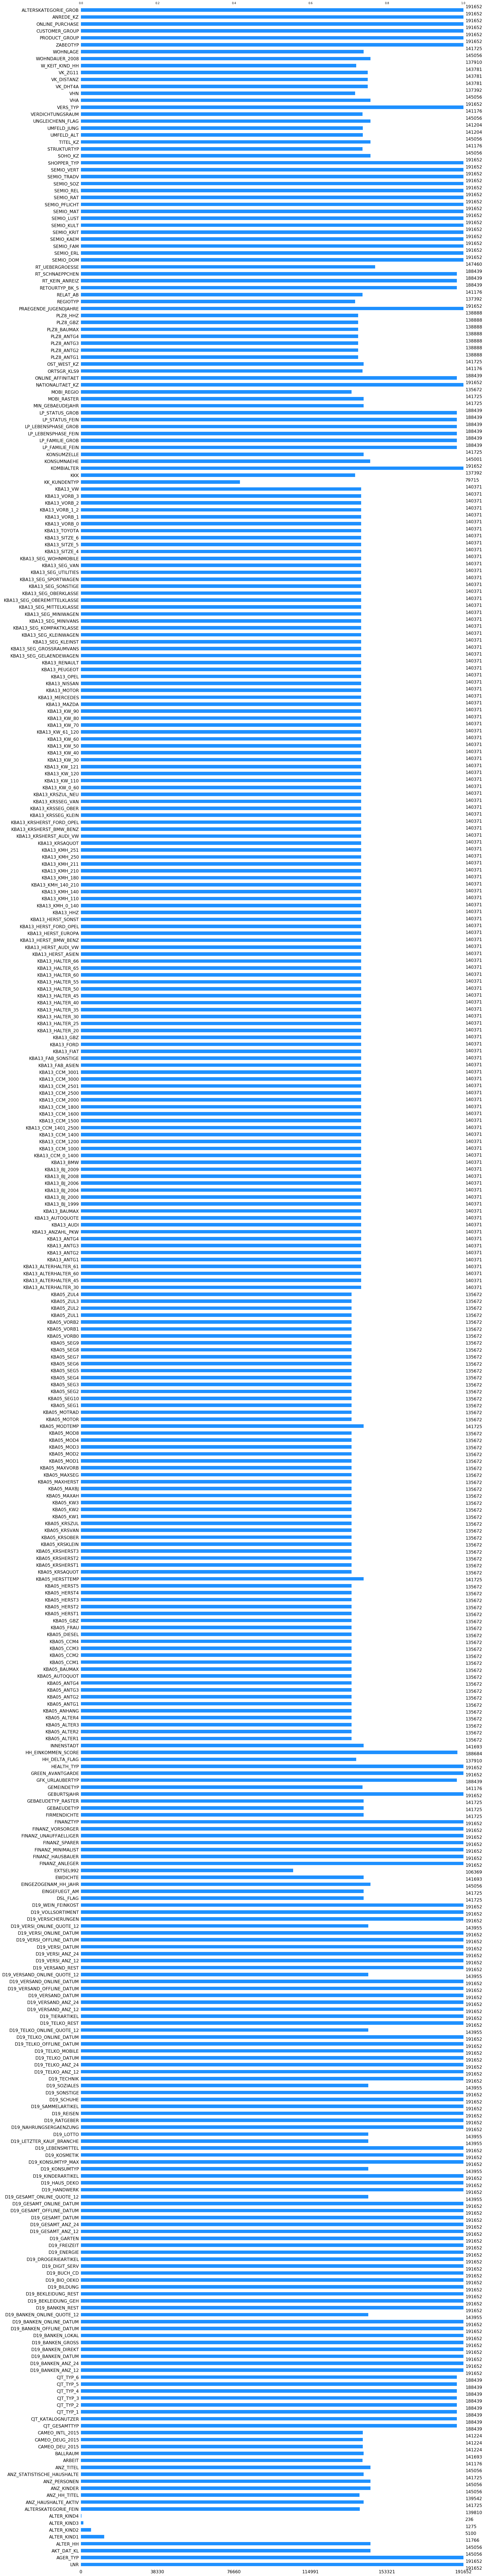

In [17]:
msno.bar(customers,color="dodgerblue")

In [28]:
## As indicated earlier general population dataframe have three less independent variables as compared with customers dataframe
general_pop.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [29]:
# Checking for missing data in general population dataframe
gen_miss = general_pop.isnull().sum()/len(general_pop)*100
gen_miss

LNR                            0.000000
AGER_TYP                       0.000000
AKT_DAT_KL                     8.247000
ALTER_HH                       8.247000
ALTER_KIND1                   90.904837
ALTER_KIND2                   96.690047
ALTER_KIND3                   99.307691
ALTER_KIND4                   99.864792
ALTERSKATEGORIE_FEIN          29.504130
ANZ_HAUSHALTE_AKTIV           10.451729
ANZ_HH_TITEL                  10.884842
ANZ_KINDER                     8.247000
ANZ_PERSONEN                   8.247000
ANZ_STATISTISCHE_HAUSHALTE    10.451729
ANZ_TITEL                      8.247000
ARBEIT                        10.908181
BALLRAUM                      10.518154
CAMEO_DEU_2015                11.106000
CAMEO_DEUG_2015               11.106000
CAMEO_INTL_2015               11.106000
CJT_GESAMTTYP                  0.544646
CJT_KATALOGNUTZER              0.544646
CJT_TYP_1                      0.544646
CJT_TYP_2                      0.544646
CJT_TYP_3                      0.544646


In [30]:
# Comparing the missing values percentage between the general population and customers dataframe
miss_diff = gen_miss - cust_miss
miss_diff

AGER_TYP                       0.000000
AKT_DAT_KL                   -16.065817
ALTERSKATEGORIE_FEIN           2.454060
ALTERSKATEGORIE_GROB           0.000000
ALTER_HH                     -16.065817
ALTER_KIND1                   -2.955910
ALTER_KIND2                   -0.648880
ALTER_KIND3                   -0.027040
ALTER_KIND4                   -0.012068
ANREDE_KZ                      0.000000
ANZ_HAUSHALTE_AKTIV          -15.599134
ANZ_HH_TITEL                 -16.305064
ANZ_KINDER                   -16.065817
ANZ_PERSONEN                 -16.065817
ANZ_STATISTISCHE_HAUSHALTE   -15.599134
ANZ_TITEL                    -16.065817
ARBEIT                       -15.429139
BALLRAUM                     -15.549406
CAMEO_DEUG_2015              -15.206275
CAMEO_DEU_2015               -15.206275
CAMEO_INTL_2015              -15.206275
CJT_GESAMTTYP                 -1.131830
CJT_KATALOGNUTZER             -1.131830
CJT_TYP_1                     -1.131830
CJT_TYP_2                     -1.131830


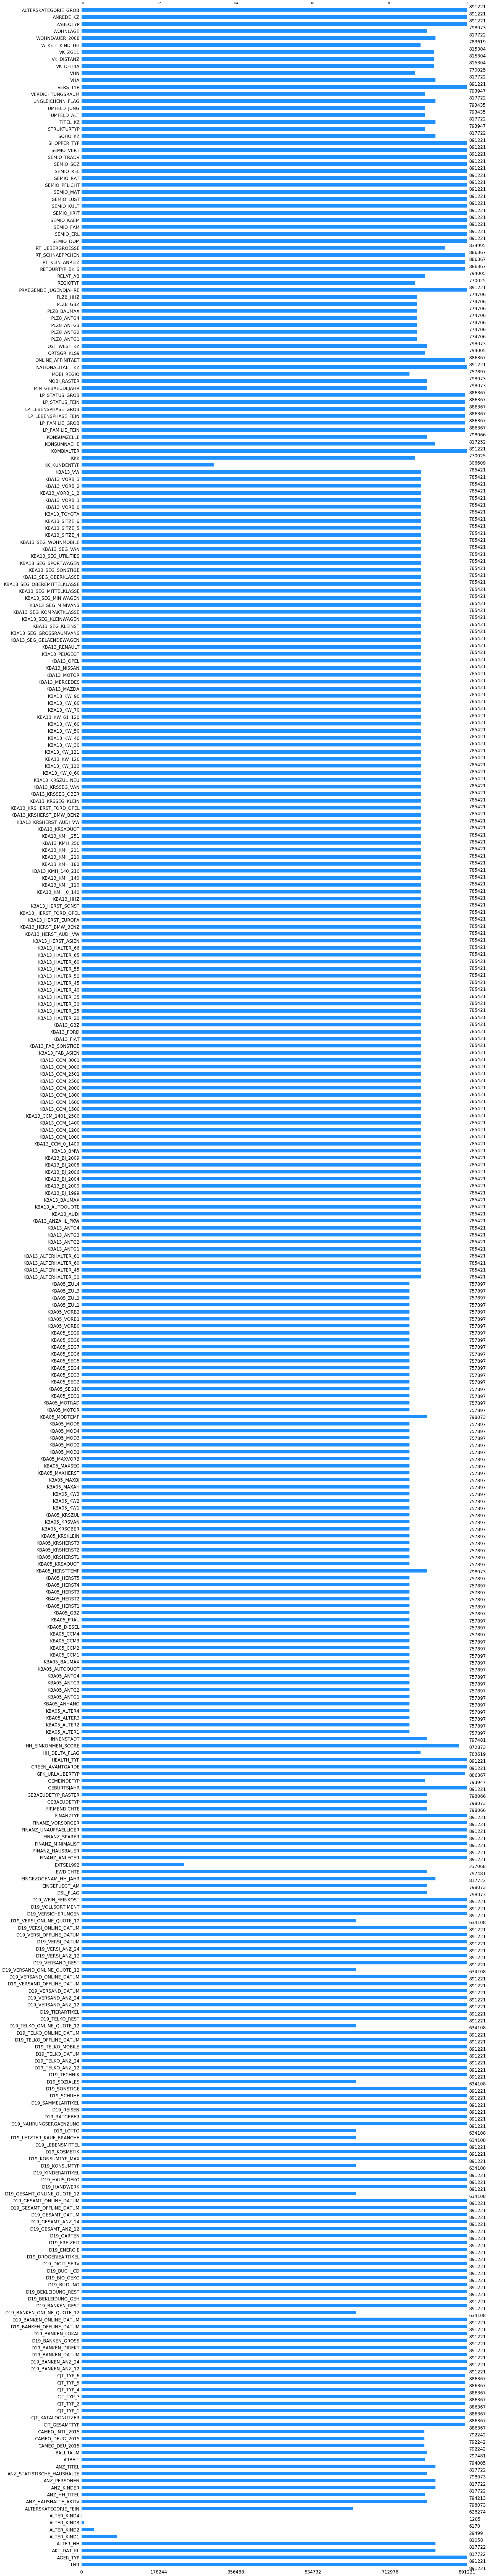

In [31]:
msno.bar(general_pop,color="dodgerblue")

Looking at the output as well as the missing plot for both customers and general population dataframes it looks like that there are multiple columns that have hight missing values. Since the population size of data is extreamly large, we can drop columns that have missing values more than 20%. We will also be dropping "LNR" variable from the list of independent variable as this variable is a unique identifier associated with individual customers and might result in producing skewed independent features. We will not be imputing rows with missing values as the independent variables with missing rows are extreamly high, we will be filling the NA rows with empty strings at this point.

In [35]:
# Selecting independent and dependent variables
customers = customers.drop(columns=['ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4','LNR'])
general_pop = general_pop.drop(columns=['ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4','LNR'])


                                    Data Preprocessing 
The feature selection function will contain a column transformoer pipleine which will select and drop numeric and categorical fields simeltaneously. Since our target variable is a numerical datatype whereas most of the independent variables are either numerical or float datatype, Feature Selection by Random Forest will be the best suited algorithm for this scenario.        

In [36]:
x = customers.iloc[:,0:-5].replace(np.nan,'',regex=True)
y = customers.iloc[:,-3]


                                    Unsupervised Feature Selection
For selecting the list of independent variables which are statistically imporatant to our dependent(target) variable "Online_Purchase", we will select "Feature Importance by Random Forest" algorithim which performs equally good for both the numerical as well as categorical datasets. 


                        FEATURE  IMPORTANCE    CUMSUM
67             D19_TELKO_ANZ_24    0.062243  0.062243
72    D19_TELKO_ONLINE_QUOTE_12    0.048980  0.111223
50                D19_HAUS_DEKO    0.032767  0.143990
63                 D19_SONSTIGE    0.026805  0.170795
24            D19_BANKEN_ANZ_24    0.026776  0.197571
70      D19_TELKO_OFFLINE_DATUM    0.021609  0.219180
0                      AGER_TYP    0.020329  0.239508
48   D19_GESAMT_ONLINE_QUOTE_12    0.019227  0.258736
64                 D19_SOZIALES    0.018152  0.276887
22                    CJT_TYP_6    0.017982  0.294869
79     D19_VERSAND_ONLINE_DATUM    0.016782  0.311651
75           D19_VERSAND_ANZ_12    0.015805  0.327456
65                  D19_TECHNIK    0.015644  0.343100
23            D19_BANKEN_ANZ_12    0.015617  0.358717
81             D19_VERSAND_REST    0.015385  0.374102
21                    CJT_TYP_5    0.015338  0.389441
36                 D19_BIO_OEKO    0.014967  0.404408
49                 D19_HANDW

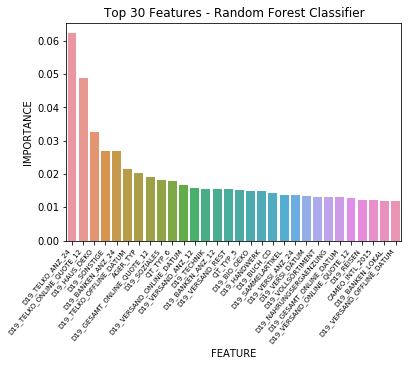

In [39]:
def feature_selection(x,y):
    """
    This function will take independent varaibles(x) and target variable(y) as the input.
    The function will parse through the independent variables and select integer and float data type elements.
    Further the function will generate a pipeline with Random Forest Classifier and finally will generate a list 
    of 30 most important independent variables on the basis of their importance to the target variable.
    Input:
          This function will take the x and y matrix of features as input
          
    Output:
          Outut will consist of list of important independent features listed out by Random Forest Classifier
          
          """
    column_trans = ColumnTransformer(transformers=
        [('num', MinMaxScaler(), selector(dtype_include="int")),
        ('cat', OrdinalEncoder(), selector(dtype_include="float"))],
        remainder='drop')

    clf = RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced')

    pipeline = Pipeline([('prep',column_trans),
                     ('clf', clf)])
    
        
    # Split the data into 30% test and 70% training
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

    pipeline.fit(X_train, y_train)

    pipeline['clf'].feature_importances_


    feat_list = []
    total_importance = 0
    # Print the name and gini importance of each feature
    for feature in zip(x, pipeline['clf'].feature_importances_):
        feat_list.append(feature)
        total_importance += feature[1]
    
    
    included_feats = []
    # Print the name and gini importance of each feature
    for feature in zip(x, pipeline['clf'].feature_importances_):
        if feature[1] > .05:
            included_feats.append(feature[0])



    # create DataFrame using data
    df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False).head(30)
    df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
    
    print(df_imp)
    
    
    ax0 = sns.barplot(x = df_imp.FEATURE, y = 'IMPORTANCE', data=df_imp)
    ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 7, rotation=50, ha="right")
    plt.title('Top 30 Features - Random Forest Classifier')
    plt.show()
    
feature_selection(x,y)   
   
  

Based on the unsupervised learning we have conduced on the customers dataframe, we now have a list of independent variables which we will use to identify any similar patterns in Germany's general population dataframe.

In [40]:
customers_new = x[['D19_TELKO_ANZ_24','D19_TELKO_ANZ_24','D19_TELKO_ONLINE_QUOTE_12','D19_HAUS_DEKO','D19_SONSTIGE','D19_BANKEN_ANZ_24',
                   'D19_TELKO_OFFLINE_DATUM','AGER_TYP','D19_GESAMT_ONLINE_QUOTE_12','D19_SOZIALES','CJT_TYP_6','D19_VERSAND_ONLINE_DATUM',
                   'D19_VERSAND_ANZ_12','D19_TECHNIK','D19_BANKEN_ANZ_12','D19_VERSAND_REST','CJT_TYP_5','D19_BIO_OEKO','D19_HANDWERK','D19_BUCH_CD',
                   'D19_SAMMELARTIKEL','D19_VERSI_ANZ_24','D19_VERSI_DATUM','D19_VOLLSORTIMENT','D19_NAHRUNGSERGAENZUNG','D19_GESAMT_ONLINE_DATUM',
                   'D19_VERSAND_ONLINE_QUOTE_12','D19_REISEN','CAMEO_INTL_2015','D19_BANKEN_LOKAL','D19_VERSAND_OFFLINE_DATUM'   
]]

After dropping the columns with maximum missing values, we will now select the columns that we identified are staticially significant with the customers purchasing behaviour in customer dataframe. We will select the all these columns from the general_pop dataframe.

In [41]:
general_pop_new = general_pop[['D19_TELKO_ANZ_24','D19_TELKO_ONLINE_QUOTE_12','D19_HAUS_DEKO','D19_SONSTIGE','D19_BANKEN_ANZ_24',
                   'D19_TELKO_OFFLINE_DATUM','AGER_TYP','D19_GESAMT_ONLINE_QUOTE_12','D19_SOZIALES','CJT_TYP_6','D19_VERSAND_ONLINE_DATUM',
                   'D19_VERSAND_ANZ_12','D19_TECHNIK','D19_BANKEN_ANZ_12','D19_VERSAND_REST','CJT_TYP_5','D19_BIO_OEKO','D19_HANDWERK','D19_BUCH_CD',
                   'D19_SAMMELARTIKEL','D19_VERSI_ANZ_24','D19_VERSI_DATUM','D19_VOLLSORTIMENT','D19_NAHRUNGSERGAENZUNG','D19_GESAMT_ONLINE_DATUM',
                   'D19_VERSAND_ONLINE_QUOTE_12','D19_REISEN','CAMEO_INTL_2015','D19_BANKEN_LOKAL','D19_VERSAND_OFFLINE_DATUM' ]]

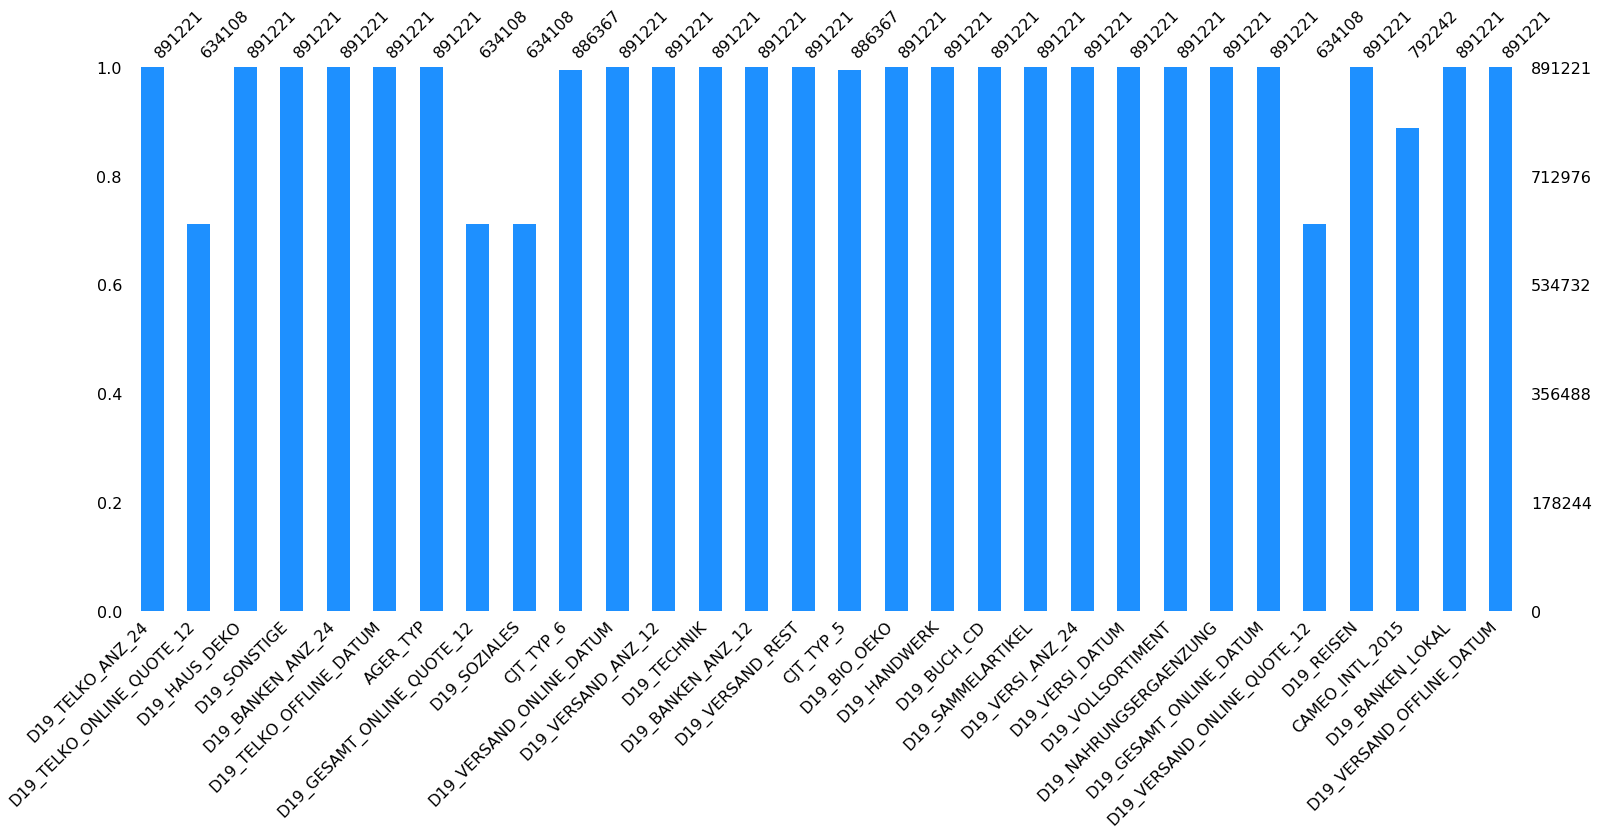

In [42]:
msno.bar(general_pop_new,color="dodgerblue")

                                            Data Preprocessing 

In [43]:
# lets change the object datatypes to numeric/float datatypes befor we perform our correlation matrix
general_pop_new = general_pop_new.fillna('')
general_pop_new = general_pop_new.convert_objects(convert_numeric=True)


                                        Unsupervised Feature Selection
We need to identify indpendent variables in the selected independent variables in general population dataframe who are positively correlated to each other                                        

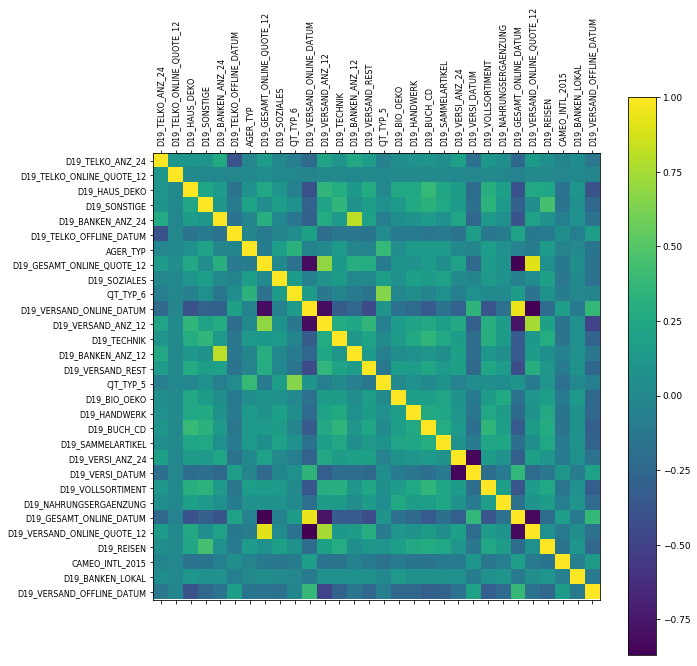

In [44]:
# Its time now to prepare our correlation matrix for the independent varaibels
f = plt.figure(figsize=(10, 10))
plt.matshow(general_pop_new.corr(), fignum=f.number)
plt.xticks(range(general_pop_new.select_dtypes(['number']).shape[1]), general_pop_new.select_dtypes(['number']).columns, fontsize=8,rotation=90)
plt.yticks(range(general_pop_new.select_dtypes(['number']).shape[1]), general_pop_new.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9);

In [45]:
matrix = general_pop_new.corr().round(2)
matrix

,D19_TELKO_ANZ_24,D19_TELKO_ONLINE_QUOTE_12,D19_HAUS_DEKO,D19_SONSTIGE,D19_BANKEN_ANZ_24,D19_TELKO_OFFLINE_DATUM,AGER_TYP,D19_GESAMT_ONLINE_QUOTE_12,D19_SOZIALES,CJT_TYP_6,...,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VOLLSORTIMENT,D19_NAHRUNGSERGAENZUNG,D19_GESAMT_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_REISEN,CAMEO_INTL_2015,D19_BANKEN_LOKAL,D19_VERSAND_OFFLINE_DATUM
D19_TELKO_ANZ_24,1.00,0.12,0.11,0.10,0.27,-0.39,-0.00,0.16,-0.00,-0.07,...,0.18,-0.19,0.12,0.05,-0.25,0.15,0.06,-0.03,0.04,-0.13
D19_TELKO_ONLINE_QUOTE_12,0.12,1.00,0.01,0.00,0.01,-0.00,0.00,0.04,0.01,0.00,...,0.00,-0.01,0.01,0.01,-0.04,0.01,0.01,-0.01,0.00,-0.01
D19_HAUS_DEKO,0.11,0.01,1.00,0.24,0.15,-0.15,0.07,0.25,0.11,-0.06,...,0.17,-0.21,0.31,0.19,-0.40,0.26,0.23,-0.16,0.11,-0.39
D19_SONSTIGE,0.10,0.00,0.24,1.00,0.12,-0.11,0.21,0.05,0.17,0.07,...,0.14,-0.18,0.34,0.14,-0.30,0.05,0.44,-0.14,0.07,-0.24
D19_BANKEN_ANZ_24,0.27,0.01,0.15,0.12,1.00,-0.16,-0.02,0.30,0.00,-0.14,...,0.23,-0.25,0.14,0.07,-0.39,0.20,0.08,-0.06,0.08,-0.16
D19_TELKO_OFFLINE_DATUM,-0.39,-0.00,-0.15,-0.11,-0.16,1.00,-0.01,-0.09,-0.03,0.05,...,-0.15,0.17,-0.12,-0.09,0.20,-0.11,-0.10,0.06,-0.06,0.17
AGER_TYP,-0.00,0.00,0.07,0.21,-0.02,-0.01,1.00,-0.08,0.17,0.33,...,-0.00,-0.02,0.18,0.08,-0.04,-0.08,0.16,-0.04,0.01,-0.15
D19_GESAMT_ONLINE_QUOTE_12,0.16,0.04,0.25,0.05,0.30,-0.09,-0.08,1.00,0.03,-0.16,...,0.20,-0.23,0.16,0.09,-0.87,0.92,0.06,-0.11,0.05,-0.16
D19_SOZIALES,-0.00,0.01,0.11,0.17,0.00,-0.03,0.17,0.03,1.00,0.16,...,0.01,-0.01,0.14,0.09,-0.05,0.03,0.19,-0.13,0.01,-0.17
CJT_TYP_6,-0.07,0.00,-0.06,0.07,-0.14,0.05,0.33,-0.16,0.16,1.00,...,-0.06,0.07,0.02,0.02,0.16,-0.16,0.09,-0.09,-0.00,-0.01


Lets only identify variables which have positive correation coefficients

In [46]:
matrix = matrix.unstack()
matrix = matrix[matrix > 0]
matrix


D19_TELKO_ANZ_24           D19_TELKO_ANZ_24               1.00
                           D19_TELKO_ONLINE_QUOTE_12      0.12
                           D19_HAUS_DEKO                  0.11
                           D19_SONSTIGE                   0.10
                           D19_BANKEN_ANZ_24              0.27
                           D19_GESAMT_ONLINE_QUOTE_12     0.16
                           D19_VERSAND_ANZ_12             0.22
                           D19_TECHNIK                    0.11
                           D19_BANKEN_ANZ_12              0.26
                           D19_VERSAND_REST               0.16
                           D19_BIO_OEKO                   0.05
                           D19_HANDWERK                   0.07
                           D19_BUCH_CD                    0.11
                           D19_SAMMELARTIKEL              0.05
                           D19_VERSI_ANZ_24               0.18
                           D19_VOLLSORTIMENT           

In [50]:
print(matrix.index)

Index(['D19_TELKO_ANZ_24', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_HAUS_DEKO',
       'D19_SONSTIGE', 'D19_BANKEN_ANZ_24', 'D19_TELKO_OFFLINE_DATUM',
       'AGER_TYP', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_SOZIALES', 'CJT_TYP_6',
       'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ANZ_12', 'D19_TECHNIK',
       'D19_BANKEN_ANZ_12', 'D19_VERSAND_REST', 'CJT_TYP_5', 'D19_BIO_OEKO',
       'D19_HANDWERK', 'D19_BUCH_CD', 'D19_SAMMELARTIKEL', 'D19_VERSI_ANZ_24',
       'D19_VERSI_DATUM', 'D19_VOLLSORTIMENT', 'D19_NAHRUNGSERGAENZUNG',
       'D19_GESAMT_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_REISEN',
       'CAMEO_INTL_2015', 'D19_BANKEN_LOKAL', 'D19_VERSAND_OFFLINE_DATUM'],
      dtype='object')


                                       Supervised Learning Model

                                               Data Load

In [47]:
def train_test_data_load(mailout_train,mailout_test):
    '''
    This function will initially load mailout-train and mailout-test dataframes. Further the function will narrow down the independent
    variables list down to the once we identified in our Unsupervised Learning Model. For the target variable we selected the customer RESPONSE
    variable and we will be using this variable as an identifier as well as for making prediction on Test Dataset.
    Input:
          mailout_train- training dataset for the marketing campaign
          mailout_test- testing dataset for the marketing campaign
    Output:
           X_train,y_train,X_test dataframe
    '''
    warnings.filterwarnings("ignore")
       
    X_train = pd.DataFrame(data = mailout_train, columns = ['D19_TELKO_ANZ_24', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_HAUS_DEKO','D19_SONSTIGE', 'D19_BANKEN_ANZ_24', 
                         'D19_TELKO_OFFLINE_DATUM','AGER_TYP', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_SOZIALES', 'CJT_TYP_6',
                         'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ANZ_12', 'D19_TECHNIK','D19_BANKEN_ANZ_12','D19_VERSAND_REST',
                         'CJT_TYP_5', 'D19_BIO_OEKO','D19_HANDWERK', 'D19_BUCH_CD', 'D19_SAMMELARTIKEL', 'D19_VERSI_ANZ_24',
                         'D19_VERSI_DATUM', 'D19_VOLLSORTIMENT', 'D19_NAHRUNGSERGAENZUNG','D19_GESAMT_ONLINE_DATUM',
                         'D19_VERSAND_ONLINE_QUOTE_12', 'D19_REISEN','CAMEO_INTL_2015', 'D19_BANKEN_LOKAL', 'D19_VERSAND_OFFLINE_DATUM'])[0:42833]
    y_train = pd.DataFrame(data = mailout_train, columns = ['RESPONSE'])[0:42833]
    
    X_test =  pd.DataFrame(data = mailout_test, columns = ['D19_TELKO_ANZ_24', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_HAUS_DEKO','D19_SONSTIGE', 'D19_BANKEN_ANZ_24','D19_TELKO_OFFLINE_DATUM','AGER_TYP', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_SOZIALES', 'CJT_TYP_6',
                     'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ANZ_12', 'D19_TECHNIK','D19_BANKEN_ANZ_12','D19_VERSAND_REST','CJT_TYP_5', 'D19_BIO_OEKO','D19_HANDWERK', 'D19_BUCH_CD', 'D19_SAMMELARTIKEL', 'D19_VERSI_ANZ_24',
                     'D19_VERSI_DATUM', 'D19_VOLLSORTIMENT', 'D19_NAHRUNGSERGAENZUNG','D19_GESAMT_ONLINE_DATUM','D19_VERSAND_ONLINE_QUOTE_12', 'D19_REISEN','CAMEO_INTL_2015', 'D19_BANKEN_LOKAL', 'D19_VERSAND_OFFLINE_DATUM'])


    
    return X_train ,y_train,X_test
train_test_data_load(mailout_train,mailout_test)

X_train,y_train,X_test = train_test_data_load(mailout_train,mailout_test)
    
    

                                                   Data Exploration 

In [48]:
X_train.head()

,D19_TELKO_ANZ_24,D19_TELKO_ONLINE_QUOTE_12,D19_HAUS_DEKO,D19_SONSTIGE,D19_BANKEN_ANZ_24,D19_TELKO_OFFLINE_DATUM,AGER_TYP,D19_GESAMT_ONLINE_QUOTE_12,D19_SOZIALES,CJT_TYP_6,...,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VOLLSORTIMENT,D19_NAHRUNGSERGAENZUNG,D19_GESAMT_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_REISEN,CAMEO_INTL_2015,D19_BANKEN_LOKAL,D19_VERSAND_OFFLINE_DATUM
0,0,0.0,0,0,0,10,2,0.0,1.0,5.0,...,0,9,6,0,9,0.0,0,34,0,9
1,1,0.0,6,6,1,1,1,0.0,5.0,4.0,...,0,10,6,0,8,0.0,0,32,3,5
2,0,0.0,0,6,1,10,1,0.0,2.0,5.0,...,0,10,6,0,7,0.0,0,14,0,6
3,0,0.0,0,6,0,10,2,0.0,1.0,4.0,...,0,10,6,0,10,0.0,0,14,0,10
4,0,0.0,0,7,0,10,2,0.0,1.0,5.0,...,0,10,7,0,10,0.0,0,41,0,7


In [49]:
X_train.isnull().sum()/len(X_train) * 100

D19_TELKO_ANZ_24                0.000000
D19_TELKO_ONLINE_QUOTE_12      17.663951
D19_HAUS_DEKO                   0.000000
D19_SONSTIGE                    0.000000
D19_BANKEN_ANZ_24               0.000000
D19_TELKO_OFFLINE_DATUM         0.000000
AGER_TYP                        0.000000
D19_GESAMT_ONLINE_QUOTE_12     17.663951
D19_SOZIALES                   17.663951
CJT_TYP_6                       1.407793
D19_VERSAND_ONLINE_DATUM        0.000000
D19_VERSAND_ANZ_12              0.000000
D19_TECHNIK                     0.000000
D19_BANKEN_ANZ_12               0.000000
D19_VERSAND_REST                0.000000
CJT_TYP_5                       1.407793
D19_BIO_OEKO                    0.000000
D19_HANDWERK                    0.000000
D19_BUCH_CD                     0.000000
D19_SAMMELARTIKEL               0.000000
D19_VERSI_ANZ_24                0.000000
D19_VERSI_DATUM                 0.000000
D19_VOLLSORTIMENT               0.000000
D19_NAHRUNGSERGAENZUNG          0.000000
D19_GESAMT_ONLIN

In [50]:
X_test.isnull().sum()/len(X_test) * 100

D19_TELKO_ANZ_24                0.000000
D19_TELKO_ONLINE_QUOTE_12      17.570565
D19_HAUS_DEKO                   0.000000
D19_SONSTIGE                    0.000000
D19_BANKEN_ANZ_24               0.000000
D19_TELKO_OFFLINE_DATUM         0.000000
AGER_TYP                        0.000000
D19_GESAMT_ONLINE_QUOTE_12     17.570565
D19_SOZIALES                   17.570565
CJT_TYP_6                       1.349427
D19_VERSAND_ONLINE_DATUM        0.000000
D19_VERSAND_ANZ_12              0.000000
D19_TECHNIK                     0.000000
D19_BANKEN_ANZ_12               0.000000
D19_VERSAND_REST                0.000000
CJT_TYP_5                       1.349427
D19_BIO_OEKO                    0.000000
D19_HANDWERK                    0.000000
D19_BUCH_CD                     0.000000
D19_SAMMELARTIKEL               0.000000
D19_VERSI_ANZ_24                0.000000
D19_VERSI_DATUM                 0.000000
D19_VOLLSORTIMENT               0.000000
D19_NAHRUNGSERGAENZUNG          0.000000
D19_GESAMT_ONLIN

In [7]:
X_train.dtypes

D19_TELKO_ANZ_24                 int64
D19_TELKO_ONLINE_QUOTE_12      float64
D19_HAUS_DEKO                    int64
D19_SONSTIGE                     int64
D19_BANKEN_ANZ_24                int64
D19_TELKO_OFFLINE_DATUM          int64
AGER_TYP                         int64
D19_GESAMT_ONLINE_QUOTE_12     float64
D19_SOZIALES                   float64
CJT_TYP_6                      float64
D19_VERSAND_ONLINE_DATUM         int64
D19_VERSAND_ANZ_12               int64
D19_TECHNIK                      int64
D19_BANKEN_ANZ_12                int64
D19_VERSAND_REST                 int64
CJT_TYP_5                      float64
D19_BIO_OEKO                     int64
D19_HANDWERK                     int64
D19_BUCH_CD                      int64
D19_SAMMELARTIKEL                int64
D19_VERSI_ANZ_24                 int64
D19_VERSI_DATUM                  int64
D19_VOLLSORTIMENT                int64
D19_NAHRUNGSERGAENZUNG           int64
D19_GESAMT_ONLINE_DATUM          int64
D19_VERSAND_ONLINE_QUOTE_

In [8]:
X_test.dtypes

D19_TELKO_ANZ_24                 int64
D19_TELKO_ONLINE_QUOTE_12      float64
D19_HAUS_DEKO                    int64
D19_SONSTIGE                     int64
D19_BANKEN_ANZ_24                int64
D19_TELKO_OFFLINE_DATUM          int64
AGER_TYP                         int64
D19_GESAMT_ONLINE_QUOTE_12     float64
D19_SOZIALES                   float64
CJT_TYP_6                      float64
D19_VERSAND_ONLINE_DATUM         int64
D19_VERSAND_ANZ_12               int64
D19_TECHNIK                      int64
D19_BANKEN_ANZ_12                int64
D19_VERSAND_REST                 int64
CJT_TYP_5                      float64
D19_BIO_OEKO                     int64
D19_HANDWERK                     int64
D19_BUCH_CD                      int64
D19_SAMMELARTIKEL                int64
D19_VERSI_ANZ_24                 int64
D19_VERSI_DATUM                  int64
D19_VOLLSORTIMENT                int64
D19_NAHRUNGSERGAENZUNG           int64
D19_GESAMT_ONLINE_DATUM          int64
D19_VERSAND_ONLINE_QUOTE_

                                            Imuting Missing Values
Since the training and testing dataset is not huge as well as the missing values percentages are reasonable, we can utilize an imputer for imputing values for the missing fields. We will be utilizing the Multivariate Imputation Chained Equation algorithim for imputing missing values. This algorithim is capable of imputing missing values for multiple columns at once and at a relatively decent speed.

In [51]:
def Mice_Imputer():
    '''
    Input:
          None
    Output:
           Multivariate Imputation Chained Equation (MICE) imputer to impute missing values       
    '''
    warnings.filterwarnings("ignore")
    return IterativeImputer(estimator=linear_model.BayesianRidge(),missing_values = np.nan,n_nearest_features=None, imputation_order='ascending')
    
Mice_Imputer()

IterativeImputer(estimator=BayesianRidge())

                                               Data Preprocess
                                              
There is only one column("CAMEO_INTL_2015") in training and testing dataset that is of Object datatype so we will only select that specific column for changing its datatype.

Splitting the training dataset into validation and partial train dataframes with the validation size set to 1000 rows. This is done in order to evaluate the accuracy of our models on training set before we fit and predict on test dataset. For this project we will be evaluating the effectiveness of each of the undermetioned classification models in terms of accuracy and run time in depending upon the volume of samples dataset along with the number of features. Naive Bayes Bagging Decision Tree Random Forest (Ensemble Learning III) Neural Network (Deep Learning) Voting Classification (Ensemble Learning IV)

In [52]:
X_train['CAMEO_INTL_2015'] = X_train['CAMEO_INTL_2015'].convert_objects(convert_numeric=True)
X_test['CAMEO_INTL_2015'] = X_test['CAMEO_INTL_2015'].convert_objects(convert_numeric=True)

# Lets fit and transform the X_train and X_test dataset using Mice imputer
X_train = pd.DataFrame(Mice_Imputer().fit_transform(X_train), columns=X_train.columns) 
X_test = pd.DataFrame(Mice_Imputer().fit_transform(X_test), columns=X_train.columns) 

validation_split=1000
x_validation=X_train[:validation_split]
x_partial_train=X_train[validation_split:]
y_validation=y_train[:validation_split]
y_partial_train=y_train[validation_split:]


                                       Feature Selection
Before we move further in our data analysis and prediction, we need to make sure that the new target variable(RESPONSE) is statiscally imporatnt to the independent variables that we selected through unsupervised learning from Cusomers and Germany's genral population's demographic information. We will be using the Random Forest Classifier algorithim coupled with the permutation importance as it can be used to overcome impurity-based feature importances shortcomings, which in turn can be used to discard irrelevant features.


[['CAMEO_INTL_2015 ', '0.008 ', ' +/- 0.000'],
 ['D19_SOZIALES ', '0.007 ', ' +/- 0.000'],
 ['AGER_TYP ', '0.006 ', ' +/- 0.000'],
 ['D19_GESAMT_ONLINE_DATUM ', '0.006 ', ' +/- 0.000'],
 ['D19_SONSTIGE ', '0.006 ', ' +/- 0.000'],
 ['D19_VERSAND_ONLINE_DATUM ', '0.005 ', ' +/- 0.000'],
 ['D19_VERSAND_OFFLINE_DATUM ', '0.005 ', ' +/- 0.000'],
 ['D19_VOLLSORTIMENT ', '0.005 ', ' +/- 0.000'],
 ['D19_BUCH_CD ', '0.005 ', ' +/- 0.000'],
 ['D19_TECHNIK ', '0.005 ', ' +/- 0.000'],
 ['D19_REISEN ', '0.004 ', ' +/- 0.000'],
 ['D19_HAUS_DEKO ', '0.004 ', ' +/- 0.000'],
 ['CJT_TYP_6 ', '0.004 ', ' +/- 0.000'],
 ['CJT_TYP_5 ', '0.004 ', ' +/- 0.000'],
 ['D19_SAMMELARTIKEL ', '0.004 ', ' +/- 0.000'],
 ['D19_HANDWERK ', '0.003 ', ' +/- 0.000'],
 ['D19_VERSI_DATUM ', '0.003 ', ' +/- 0.000'],
 ['D19_VERSAND_ANZ_12 ', '0.003 ', ' +/- 0.000'],
 ['D19_VERSAND_ONLINE_QUOTE_12 ', '0.002 ', ' +/- 0.000'],
 ['D19_NAHRUNGSERGAENZUNG ', '0.002 ', ' +/- 0.000'],
 ['D19_VERSAND_REST ', '0.002 ', ' +/- 0.000'],
 [

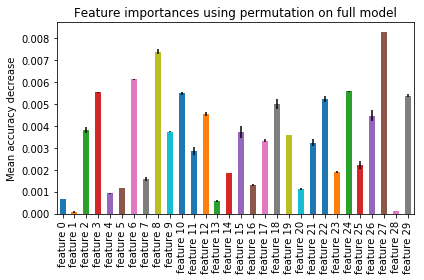

In [53]:
def final_features():
    '''
    Input:
        None
    Output:
          Plot depicting the final independent features per their index values which are statistical significant
          to our target variable RESPONSE.
   ''' 
    warnings.filterwarnings("ignore")
    
    feature_names = [f"feature {i}" for i in range(x_partial_train.shape[1])]
    forest = RandomForestClassifier(random_state=10)
    forest.fit(x_partial_train, y_partial_train)
    result = permutation_importance(
        forest, x_partial_train, y_partial_train, n_repeats=2, random_state=10, n_jobs=1
    )
    Final_Features = []
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            Final_Features.append([f"{X_train.columns[i]:<8} ", f"{result.importances_mean[i]:.3f} ",f" +/- {result.importances_std[i]:.3f}"])
   
    forest_importances = pd.Series(result.importances_mean, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    
    return Final_Features
    return plt.show()
    
    
final_features()

                                        Output Analysis
Looking at the Mean Accuracy Decrease scores as well as the plot depicting feature importance, we will be excluding feature with Mean Accuracy Decrease Score <= 0.000.

In [54]:
X_train_updated = pd.DataFrame(data=X_train, columns = ['CAMEO_INTL_2015','AGER_TYP','D19_SAMMELARTIKEL','D19_VERSAND_OFFLINE_DATUM','D19_SOZIALES','D19_BUCH_CD','D19_VOLLSORTIMENT', 'D19_VERSI_DATUM','D19_NAHRUNGSERGAENZUNG', 'D19_HAUS_DEKO',
                                                        'CJT_TYP_6', 'D19_GESAMT_ONLINE_DATUM','D19_REISEN','D19_SONSTIGE','D19_VERSAND_ONLINE_DATUM','D19_TECHNIK','CJT_TYP_5',
                                                        'D19_HANDWERK','D19_GESAMT_ONLINE_QUOTE_12','D19_VERSAND_ONLINE_QUOTE_12','D19_VERSAND_ANZ_12','D19_VERSAND_REST',
                                                        'D19_BIO_OEKO','D19_TELKO_OFFLINE_DATUM','D19_VERSI_ANZ_24','D19_BANKEN_ANZ_24','D19_TELKO_ANZ_24','D19_BANKEN_ANZ_12'])
X_test_updated = pd.DataFrame(data=X_test, columns =   ['CAMEO_INTL_2015','AGER_TYP','D19_SAMMELARTIKEL','D19_VERSAND_OFFLINE_DATUM','D19_SOZIALES','D19_BUCH_CD', 'D19_VOLLSORTIMENT',
                                                      'D19_VERSI_DATUM','D19_NAHRUNGSERGAENZUNG', 'D19_HAUS_DEKO','CJT_TYP_6', 'D19_GESAMT_ONLINE_DATUM','D19_REISEN','D19_SONSTIGE',
                                                      'D19_VERSAND_ONLINE_DATUM','D19_TECHNIK','CJT_TYP_5', 'D19_HANDWERK','D19_GESAMT_ONLINE_QUOTE_12','D19_VERSAND_ONLINE_QUOTE_12',
                                                      'D19_VERSAND_ANZ_12','D19_VERSAND_REST','D19_BIO_OEKO','D19_TELKO_OFFLINE_DATUM','D19_VERSI_ANZ_24','D19_BANKEN_ANZ_24',
                                                      'D19_TELKO_ANZ_24','D19_BANKEN_ANZ_12'])


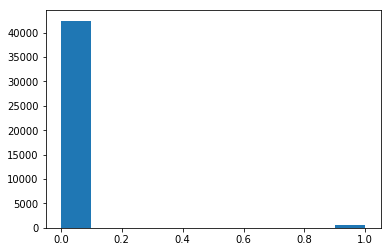

In [13]:
plt.hist(mailout_train['RESPONSE'])
plt.show()

                                      Metric development
                                     
The above output reflects that the training set have an unequal distribution of “Response” class. Therefore selecting a model performance only on accuracy % percentage will not be an ideal situation as the model might make skewed predictions. Therefore we will base our judgement for model selection on Models Accuracy, Precision, Recall scores.

We will training and evaluate all the models on the training dataset spitted into partial train and train evaluation datasets so that we can check models performance before deploying the best performing model on the test dataset.

                                     Model Evaluation and Selection

In the first section of model selection and evaluation, we will loop through multiple classification models and analyze their performances on the splitted partial train and validation datasets. These models will be accessed on Models overall "Accuracy, Precision, and Recall" criteria. Once the best model gets selected on the basis of above criteria, we will then deploy and predict the output on the Test Data Set as provided in this project.

,Accuracy,Precision,Recall
Stochastic Gradient Descent,0.926422,0.101365,0.019483
Support Vector Machines,0.987737,0.000000,0.000000
Decision Trees,0.965673,0.037037,0.019771
Random Forest,0.987713,0.000000,0.000000
Bernoulli NB,0.987665,0.000000,0.000000
K-Nearest Neighbor,0.987737,0.000000,0.000000
Bagging Classifier,0.987307,0.000000,0.000000


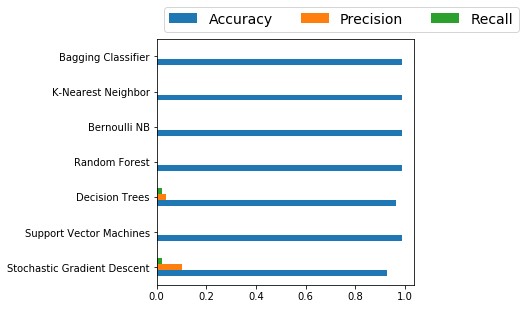

In [55]:
def model_evaluation_selection_(x_validation,y_validation,x_partial_train,y_partial_train):
    '''
    This function will generate a dataframe containing classification models Accuracy,Precision and f1 score along with visualization
    that will assist us in selecting the best performing classification model.
     
    Input:
        x_validation- 1000 records from x_train dataframe that will be used as a training set of independent variables
        x_partial_train- x_train dataframe of independent variables excluding x_validation 
        y_validation- 1000 records from y_train dataframe that will be used as a training set of target variable
        y_partial_train - y_train dataframe of target variable excluding y_validation 
    Output:
           Dataframe with classification models Accuracy, Precision and f1 score
    '''
    warnings.filterwarnings("ignore")
    models = {}
    
    models['Stochastic Gradient Descent'] = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0005, l1_ratio=0.15, fit_intercept=True, max_iter=1000, 
                                          tol=0.001, shuffle=True, epsilon=0.1, random_state=10, learning_rate='optimal')
    models['Support Vector Machines'] = SVC(C=0.0001, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr', random_state=10)

    models['Decision Trees'] = DecisionTreeClassifier( criterion='gini', splitter='best',random_state=10)

    models['Random Forest'] = RandomForestClassifier(n_estimators=30, criterion='gini',min_samples_split=2,bootstrap=True,
                                                     oob_score=False,random_state=10)
    models['Bernoulli NB'] = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)

    models['K-Nearest Neighbor'] = KNeighborsClassifier(algorithm = 'brute',n_jobs=-1,n_neighbors=10, weights='uniform',leaf_size=30, metric='minkowski')

    models['Bagging Classifier'] = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
    
      
    accuracy, precision, recall = {}, {}, {}

    for key in models.keys():

        # Fit the classifier
        models[key].fit(x_validation, y_validation)

        # Make predictions
        predictions = models[key].predict(x_partial_train)

        # Calculate metrics
        accuracy[key] = accuracy_score(predictions, y_partial_train)
        precision[key] = precision_score(predictions, y_partial_train)
        recall[key] = recall_score(predictions, y_partial_train)


    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()

    ax = df_model.plot.barh()
    ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
    )
    plt.tight_layout()


    return df_model
    return  plt.tight_layout()
    
model_evaluation_selection_(x_validation,y_validation,x_partial_train,y_partial_train)

                                         Result
There were two classification models that performed extremally well on our partial training and validation dataset. “Stochastic Gradient Descent” classification model have the highest Precision and Recall values whereas “Decision Tree Classifier” have a high Accuracy % but lower Precision and Recall values than the SGD. As mentioned earlier we will select evaluate a model performance on the basis of all three criteria as laid out in our Metric section. Thus, Decision Tree seems to be the best performing model on which we will deploy test dataset

                                      Model Deployment and Prediction 

After evaluating our Decision Tree Model performance on partial train and train evaluation dataset, its time to deploy our model on the test dataset and make final predictions.

Attached below is a Decision Tree Pipeline which performed all the necessary steps such as data scaling, parameter tunning and model selection . We wanted selected the parameter for our model to be balanced out so that the model can train and assesses both the classes equally. Further, we utilized Grid Search CV method to fit and predict the results for final evaluation.

[[1754, 1],
 [1770, 1],
 [1465, 1],
 [1470, 1],
 [1478, 1],
 [1782, 1],
 [1485, 1],
 [1519, 1],
 [1835, 1],
 [1522, 1],
 [1539, 1],
 [1853, 1],
 [1856, 1],
 [2502, 1],
 [2182, 1],
 [2191, 1],
 [2522, 1],
 [2530, 1],
 [2215, 1],
 [2550, 1],
 [2570, 1],
 [2574, 1],
 [2579, 1],
 [2247, 1],
 [2674, 1],
 [11434, 1],
 [11122, 1],
 [11127, 1],
 [11443, 1],
 [11170, 1],
 [11191, 1],
 [11198, 1],
 [10936, 1],
 [11244, 1],
 [11247, 1],
 [11252, 1],
 [11259, 1],
 [10945, 1],
 [10951, 1],
 [11271, 1],
 [10963, 1],
 [11282, 1],
 [11291, 1],
 [10980, 1],
 [10994, 1],
 [10998, 1],
 [11303, 1],
 [11630, 1],
 [11636, 1],
 [11949, 1],
 [11950, 1],
 [11956, 1],
 [11648, 1],
 [11653, 1],
 [11967, 1],
 [11972, 1],
 [11975, 1],
 [12110, 1],
 [12113, 1],
 [11712, 1],
 [11716, 1],
 [12000, 1],
 [11722, 1],
 [12023, 1],
 [12046, 1],
 [11762, 1],
 [12071, 1],
 [12077, 1],
 [11785, 1],
 [11788, 1],
 [11790, 1],
 [11800, 1],
 [11806, 1],
 [11816, 1],
 [11505, 1],
 [11837, 1],
 [11531, 1],
 [11848, 1],
 [11854, 1]

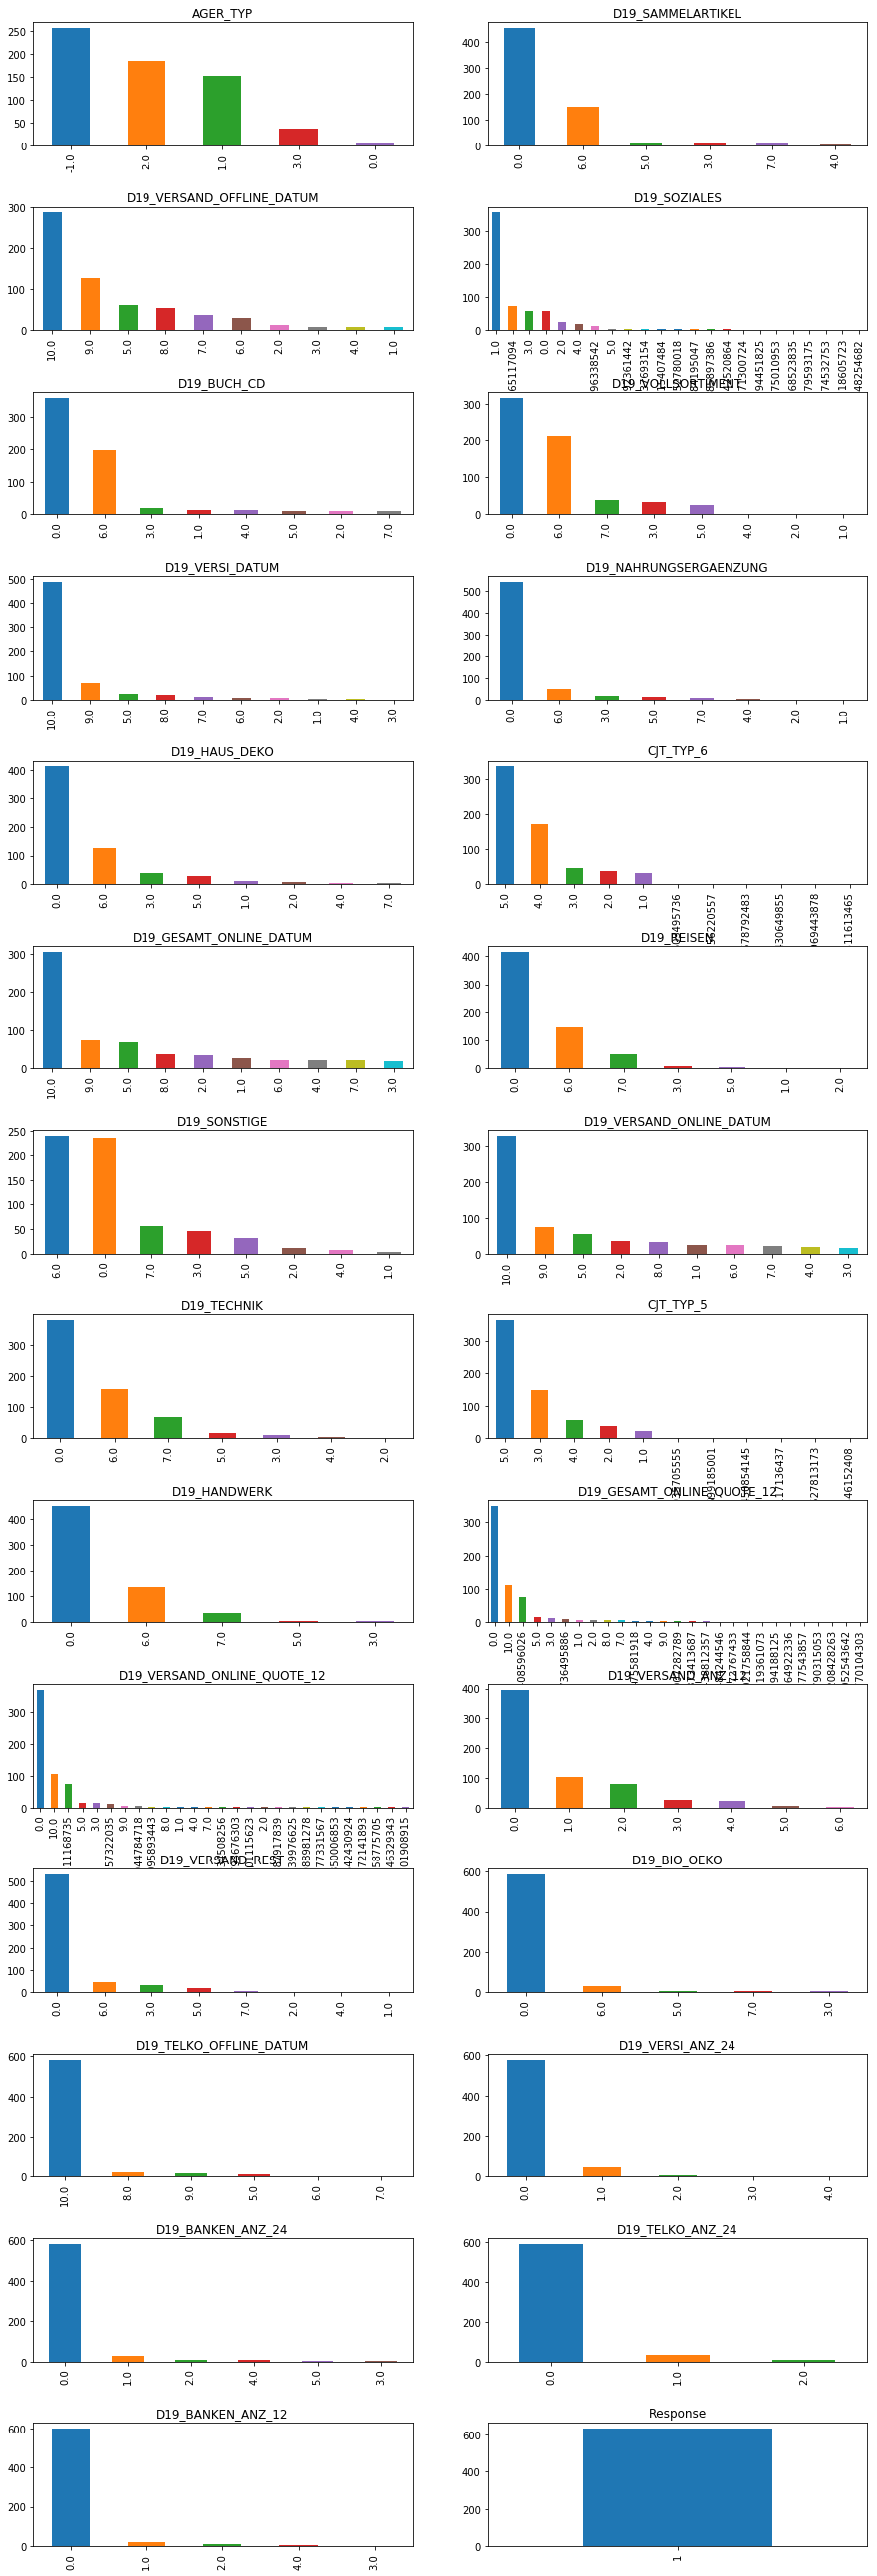

In [56]:
def classification_pipeline(X_train_updated,y_train,X_test_updated):
    '''
    Input: 
         None
    Output:
          list of predicted RESPONSE values on Test Dataset 
    '''
    
    warnings.filterwarnings("ignore")
    pipeline = Pipeline(
        [
        ("scaler",StandardScaler()),
        ("clf", tree.DecisionTreeClassifier(random_state=10)),
        ]
        )
    parameters = {
        "scaler__with_mean": [True,False],   
        "clf__criterion": ['gini','entropy'],
        "clf__max_features": [1,5,10,15,20],
        "clf__class_weight": ['balanced']
        }
    

    grid_search = GridSearchCV(pipeline, parameters,n_jobs=-1,cv=5,return_train_score=True)
    grid_search.fit(X_train_updated,y_train)
    y_pred = grid_search.predict(X_test_updated)
    X_test_updated["Response"]  = y_pred    
    X_new = X_test_updated[X_test_updated['Response'] == 1]
    mailout_test =  pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')
    Final_Pred = []
    for i,j in zip(mailout_test['LNR'].values,X_new['Response'].values):
        Final_Pred.append([i,j])
    
    
    nr_of_plots = len(X_new.columns)
    nr_of_plots_per_row = 2
    nr_of_rows = math.ceil(nr_of_plots / nr_of_plots_per_row)

    # Defining the Matplotlib Figure and Axes
    figure, axes = plt.subplots(nrows=nr_of_rows, ncols=nr_of_plots_per_row, figsize=(15, 50))
    figure.subplots_adjust(hspace=0.5)

    # Plotting on the Axes
    i, j = 0, 0
    for column_name in X_new:
        if X_new[column_name].nunique() <= 30:
            axes[i][j].set_title(column_name)
            X_new[column_name].value_counts().plot(kind='bar', ax=axes[i][j])
            j += 1
            if j % nr_of_plots_per_row == 0:
                i += 1
                j = 0

    # Cleaning up unused Axes
    # plt.subplots creates a square grid of Axes. On the last row, not all Axes will always be used. Unused Axes are removed here.
    axes_flattened = axes.flatten()
    for ax in axes_flattened:
        if not ax.has_data():
            ax.remove()

    return Final_Pred
    
classification_pipeline(X_train_updated,y_train,X_test_updated)


                                                 Conclusion

The project was able to predict the list of Features that have the potential of becoming the prospective customers of Arvato Financials Services. There are number of takeaways that can be derived from the above output window. From the analysis we have conducted we can predict that there are 652 individuals in the maiout-test data which can be made Arvato Financials Services prospective customers.From the output window as above there are certain class with those indiviual population which are more likely to become Arvato Financials Services customers from others. 

The final analysis was able to identify and predict Germany's general population demographics. Some of the major takeaways from this were:

1. Age Type - Germany's Culturely Elederly population is more like to become Arvato Financials Services prospective customers.
2. Buyer Type - Customers more than 2 years with the Arvato Financials Services are more likely to buy another product.
3. Customer journey typology- Individuals who are seeking orientation are more likely to become customers than their counterpart.
4. TECHNOLOGY - Here our analyis predicted that Individuals who have indifferent mindset with respect to Technology product group are likely to become Arvato Financials Services prospective customers.
5. Mail-Order Online/Mail-Order Online - Arvato Financials Services Customers with higest online/offline activity in last 3 years are likely to buy another finanacial product with the company.
6. BOOKS and CDS - BOOKS and CDS Buyers > 24 months of purchasing history are more likely to become Arvato Financials Services Customers.
7. HOUSE DECORATION - Individuals with who have made a purchase of HOUSE DECORATION Buyers > 24 months or higher are likely to become customers.
8. TOTAL - Individuals with 100% Online-transactions within the last 12 months are extreamly likely to become Arvato Financials Services customers.
9. DIETARY SUPPLEMENTS - Our Analysis was able to predict that individuals who have a transactional activity in DIETARY SUPPLEMENTS for 24 months or higher are likely to become Arvato Financials Services customer as well.
10. ALL OTHER CATEGORIES - Finally our analysis also predicted that individuals whose transational activity is extreamly high in All Other product Categories are very likely to become customers of Arvato Financials Services as well.   


                                                    Improvement

1. The Business Glossary provided did not cover all the feature definitions. Due to lack of understanding for some of these features, proper analysis could not be done.
2. The MICE imputer could have been implemented to impute values for some of the columns that got populated with the missing strings. This was done because of low CPU capability on my end.
3. Better model selection and predictions could have been made if I had more time on my end.